look at the very last graph (error against beta). what are these wavy patterns!!

Note: This version uses np.linalg.norm(psi_final - psi_correct), not (np.dot(psi_correct, psi_final))**2

In [320]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [321]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [322]:
Values = [10, 1]
Weights = [2, 3]
Ancil = [1, 2]

alpha = 1e1
# beta = 7.0
beta = 4
gamma = max(Values) + 1
T = 1
t_axis = np.arange(0, T, 0.01)

In [323]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [324]:
# H0 = np.zeros((2**(len(Values) + len(Ancil)), 2**(len(Values) + len(Ancil))))
H0 = np.kron(np.kron(np.kron(sigmaX, sigmaI), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaX), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaX), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaX)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-4.000000000000003
[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]


In [325]:
Hp = (
    - (Values[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Values[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
    + gamma * (
        (Weights[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Weights[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
      - (Ancil[0] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaBin), sigmaI) + Ancil[1] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaBin))
    )**2
)
# print(Hp)

eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [326]:
def H(t):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

# print(H(0))
# print(H(T))

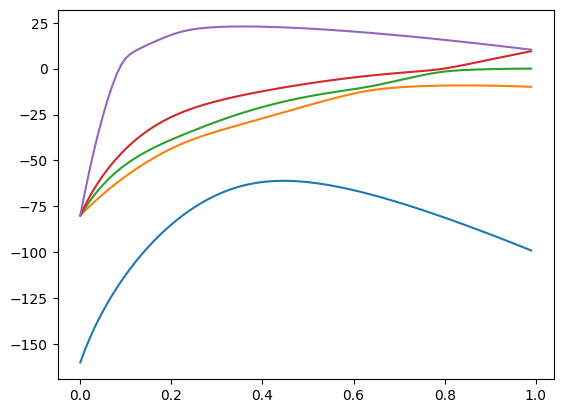

In [327]:
instant_eigenvals = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)

In [328]:
int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)

In [329]:
U = expm(-1j * int_H_T)
# print(U.conjugate().transpose() @ U)

In [330]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
print(psi_ini)
print(np.linalg.norm(psi_ini))

[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]
1.0000000000000004


In [331]:
psi_final = U @ psi_ini
print(psi_final)
print(np.linalg.norm(psi_final))

[ 0.084+0.276j  0.077-0.169j -0.191-0.061j -0.167-0.076j  0.193+0.098j
 -0.001-0.083j -0.161+0.115j -0.066-0.29j  -0.19 -0.029j  0.154-0.489j
  0.159+0.204j -0.215+0.046j -0.211-0.117j  0.212+0.035j  0.224+0.05j
 -0.063+0.228j]
0.9999999999999746


In [332]:
psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [333]:
def int_H(t):
    return 0.5 * alpha * t / T * (2 * beta * H0*T + (-beta * H0 + Hp)*t )

def Unitary(t):
    return expm(-1j * int_H(t))

In [334]:
int_H(T) - int_H_T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [335]:
int_H(T)

array([[   0.,   20.,   20.,    0.,   20.,    0.,    0.,    0.,   20.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [  20.,  220.,    0.,   20.,    0.,   20.,    0.,    0.,    0.,
          20.,    0.,    0.,    0.,    0.,    0.,    0.],
       [  20.,    0.,   55.,   20.,    0.,    0.,   20.,    0.,    0.,
           0.,   20.,    0.,    0.,    0.,    0.,    0.],
       [   0.,   20.,   20.,  495.,    0.,    0.,    0.,   20.,    0.,
           0.,    0.,   20.,    0.,    0.,    0.,    0.],
       [  20.,    0.,    0.,    0.,  490.,   20.,   20.,    0.,    0.,
           0.,    0.,    0.,   20.,    0.,    0.,    0.],
       [   0.,   20.,    0.,    0.,   20.,   50.,    0.,   20.,    0.,
           0.,    0.,    0.,    0.,   20.,    0.,    0.],
       [   0.,    0.,   20.,    0.,   20.,    0.,  215.,   20.,    0.,
           0.,    0.,    0.,    0.,    0.,   20.,    0.],
       [   0.,    0.,    0.,   20.,    0.,   20.,   20.,   -5.,    0.,
           0.,    0.,    0

In [336]:
H(T)

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,  440.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,  110.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,  990.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,  980.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,  100.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,  430.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,  -10.,    0.,
           0.,    0.,    0

In [337]:
Unitary(T)

array([[-0.176+0.734j, -0.041+0.014j,  0.097-0.419j,  0.002+0.006j,
        -0.03 -0.057j,  0.053+0.093j,  0.001+0.051j, -0.266-0.058j,
         0.081-0.058j,  0.027-0.059j,  0.286-0.063j,  0.052+0.217j,
        -0.001+0.002j, -0.005-0.002j, -0.008+0.001j,  0.026-0.025j],
       [-0.041+0.014j, -0.436+0.85j , -0.005+0.035j, -0.032-0.099j,
         0.   -0.016j, -0.014+0.18j , -0.009-0.024j,  0.002+0.042j,
        -0.101+0.058j, -0.071+0.115j, -0.039+0.039j,  0.02 -0.05j ,
         0.002-0.j   , -0.   -0.022j,  0.001-0.j   , -0.007-0.001j],
       [ 0.097-0.419j, -0.005+0.035j,  0.406-0.572j, -0.07 +0.001j,
         0.008+0.011j, -0.145-0.051j, -0.175+0.111j,  0.082+0.083j,
        -0.03 +0.101j,  0.043+0.108j,  0.221-0.329j,  0.229-0.009j,
         0.   -0.002j,  0.007-0.002j, -0.001+0.005j, -0.037-0.012j],
       [ 0.002+0.006j, -0.032-0.099j, -0.07 +0.001j, -0.869-0.472j,
        -0.001+0.003j,  0.005+0.006j,  0.012-0.007j, -0.023-0.046j,
        -0.   -0.008j,  0.005-0.031j,  0.019+

In [338]:
Unitary(T).conjugate().transpose() @ Unitary(T)

array([[ 1.+0.j,  0.-0.j,  0.+0.j, -0.-0.j,  0.+0.j, -0.-0.j, -0.-0.j,
         0.+0.j, -0.-0.j, -0.+0.j,  0.+0.j,  0.-0.j, -0.-0.j,  0.-0.j,
        -0.-0.j, -0.-0.j],
       [ 0.+0.j,  1.+0.j, -0.+0.j, -0.+0.j, -0.-0.j,  0.-0.j, -0.+0.j,
        -0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j, -0.-0.j, -0.-0.j,
         0.-0.j, -0.+0.j],
       [ 0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j,
        -0.-0.j, -0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j, -0.-0.j,
        -0.-0.j,  0.+0.j],
       [-0.+0.j, -0.-0.j, -0.-0.j,  1.+0.j, -0.-0.j, -0.-0.j,  0.+0.j,
        -0.+0.j, -0.-0.j, -0.-0.j, -0.+0.j, -0.-0.j,  0.+0.j, -0.+0.j,
        -0.-0.j,  0.-0.j],
       [ 0.-0.j, -0.+0.j,  0.-0.j, -0.+0.j,  1.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j, -0.+0.j,  0.-0.j, -0.+0.j, -0.-0.j, -0.-0.j, -0.+0.j,
        -0.-0.j, -0.+0.j],
       [-0.+0.j,  0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,  1.-0.j, -0.+0.j,
         0.-0.j,  0.-0.j, -0.-0.j, -0.+0.j,  0.-0.j, -0.-0.j,  0.+0.j,
         0.-0

In [339]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

# psi_t_list = []
energy_expectation_t_list = []
psi_t_list = []

for t in t_axis:
    psi_t = Unitary(t) @ psi_ini
    # print(psi_t)
    # print(np.linalg.norm(psi_t))
    energy_expectation_t_list.append(psi_t.conjugate().transpose() @ H(t) @ psi_t)
    psi_t_list.append(psi_t)

print(energy_expectation_t_list)
for psi_t in psi_t_list:
    print(psi_t, sep="\n")

[np.complex128(-160.0000000000001+0j), np.complex128(-153.0376856105561+0j), np.complex128(-146.97609673331158-8.881784197001252e-16j), np.complex128(-140.57357379731573-1.7763568394002505e-15j), np.complex128(-134.00667195794568-7.105427357601002e-15j), np.complex128(-130.21602259018886+3.552713678800501e-15j), np.complex128(-122.02308832577262+7.105427357601002e-15j), np.complex128(-112.45098506909659-1.7763568394002505e-15j), np.complex128(-114.41343361691821+0j), np.complex128(-107.37658477202172+3.552713678800501e-15j), np.complex128(-96.78164877712277-3.552713678800501e-15j), np.complex128(-100.21122482639413+0j), np.complex128(-87.61017002803796-3.552713678800501e-15j), np.complex128(-84.52479251538719+0j), np.complex128(-87.83001228950161+6.661338147750939e-16j), np.complex128(-75.30170500786934+0j), np.complex128(-74.50077385014468+1.7763568394002505e-15j), np.complex128(-68.29500563232949+0j), np.complex128(-64.91490101646303-3.552713678800501e-15j), np.complex128(-49.0788704

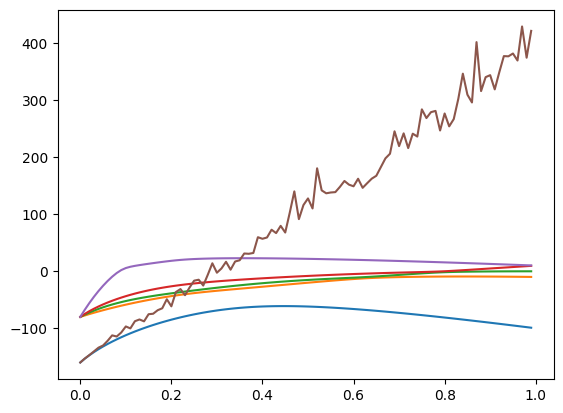

In [340]:
instant_eigenvals = []
instant_eigenvecs = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)
plt.plot(t_axis, energy_expectation_t_list)

In [341]:
error_list = []
beta_list = np.arange(0, 1000, 1)

for beta in beta_list:
    int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)
    U = expm(-1j * int_H_T)

    psi_final = U @ psi_ini
    print(psi_final)
    print(psi_final.conjugate().transpose() @ psi_final)
    error = np.linalg.norm(psi_final - psi_correct)
    print(error)
    error_list.append(error)
    
error_list = np.array(error_list)

[ 0.25 +0.j    -0.249+0.022j -0.006-0.25j   0.049+0.245j -0.249-0.022j
  0.241+0.066j  0.049-0.245j -0.071+0.24j  -0.234+0.087j  0.241-0.066j
  0.071+0.24j  -0.071-0.24j   0.216-0.127j -0.246+0.044j  0.081+0.236j
 -0.017-0.249j]
(1.0000000000000009+0j)
1.2318753937610507
[ 0.093+0.302j -0.234+0.075j -0.169-0.197j  0.114+0.215j -0.244+0.02j
  0.245+0.011j  0.022-0.237j -0.23 +0.146j -0.182+0.141j  0.229+0.12j
  0.183+0.11j  -0.213-0.104j  0.195-0.153j -0.23 +0.086j  0.095+0.23j
 -0.048-0.232j]
(1.000000000000013+0j)
1.241829532151008
[ 0.024+0.16j  -0.088+0.193j -0.103+0.121j  0.214+0.082j -0.194+0.133j
  0.135+0.001j -0.089-0.202j  0.257-0.446j  0.07 +0.179j -0.333+0.179j
  0.208+0.058j -0.133-0.047j  0.118-0.216j -0.136+0.18j   0.135+0.206j
 -0.169-0.132j]
(0.9999999999999394+0j)
1.6329516815551302
[ 0.229+0.026j  0.122+0.15j  -0.01 -0.213j  0.143-0.154j -0.032+0.228j
  0.14 -0.075j -0.177-0.072j -0.234-0.25j   0.096-0.118j  0.322-0.077j
  0.293+0.237j -0.252-0.223j -0.039-0.24j   0.0

Text(0, 0.5, 'error')

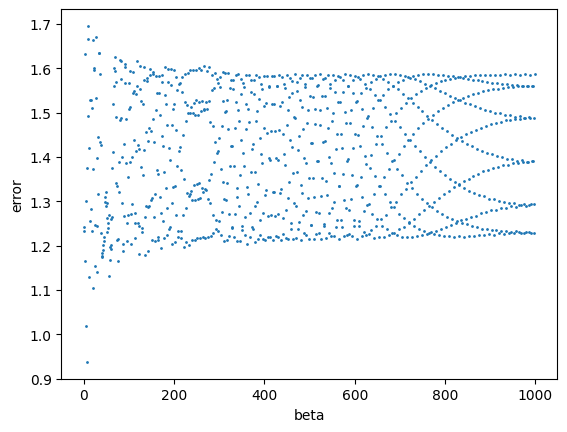

In [342]:
plt.scatter(beta_list, error_list, s=1)
plt.xlabel("beta")
plt.ylabel("error")

In [343]:
min(error_list)

np.float64(0.9376418536950186)

In [344]:
beta_list[error_list.argmin()]

np.int64(7)